In [1]:
from sklearn import cluster, datasets

In [2]:
iris = datasets.load_iris()
target = iris.target
data = iris.data

In [3]:
k_means = cluster.KMeans(n_clusters=3)  # Clustering estimator
k_means.fit(data)
# Learning is unsupervised, so fit does not take a y value

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
k_means.predict(data[135:])

array([0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [5]:
target[135:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Almost completely different, but for good reason

In [7]:
import matplotlib.pyplot as plt

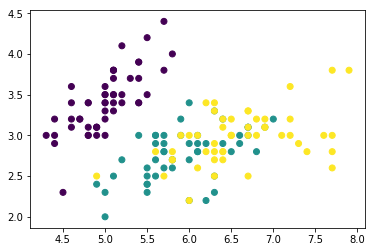

In [8]:
plt.scatter(*data[:, :2].T, c=target)

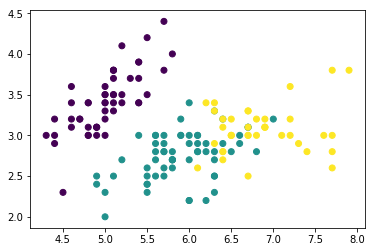

In [9]:
def correct_color(c):
    correct_colors = {
        0: 2,
        1: 0,
        2: 1
    }
    return correct_colors[c]
    
plt.scatter(
    *data[:, :2].T, 
    c=list(map(correct_color, k_means.labels_))
)

In [10]:
# Once we identify each group and assign
# the correct color to each, it looks like
# it's at least more accurate than chance, nice.

# Definitely not an ideal case for a cluster estimator though!

In [11]:
from sklearn.svm import SVC
from random import sample
import numpy as np

In [12]:
clf = SVC()

In [13]:
randomized = sample(list(zip(iris.data, iris.target)), 100)
clf.fit([x for x, _ in randomized], [y for _, y in randomized])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

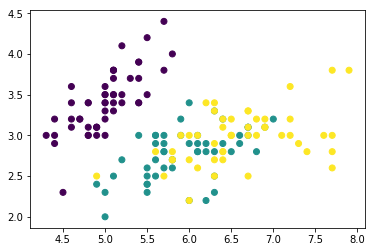

In [14]:
plt.scatter(
    *data[:, :2].T,
    c=clf.predict(data)
)

In [15]:
# Appears to be a lot more accurate, woohoo